In [6]:
import os
import pandas as pd

In [7]:
database = pd.read_excel(os.path.join('data', 'database.xlsx'))
database

,Date naissance,Date inclusion,Age,Sexe,Poids,Taille,IMC,Hypertension artérielle,Diabète,Dyslipidémie,...,Ferritine',Actitest',Fibrotest',Insuline',Peptide C',Dépense énergétique de repos',Syndrome d'apnée du sommeil',Appareillée',Elastométrie',CAP'
0,1973-03-06,2015-02-04,48,1,143,183,42.700588,0,0,0,...,332,0.17,0.11,13,-1.0,-1,0,0,16.9,294
1,1966-11-18,2014-12-02,55,0,129,176,41.645145,0,0,1,...,147,0.40,0.19,14,-1.0,1877,0,0,4.8,313
2,1964-11-21,2012-12-04,57,0,118,178,37.242772,0,0,0,...,-1,-1.00,-1.00,-1,-1.0,-1,-1,-1,-1.0,-1
3,1964-05-25,2017-04-07,57,0,131,157,53.146172,1,0,0,...,7,0.04,0.14,6,1.1,1452,-1,1,7.7,308
4,1958-11-07,2013-01-07,63,0,121,156,49.720579,0,1,0,...,153,-1.00,-1.00,12,-1.0,1605,4,1,3.5,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,1958-10-15,2018-09-14,63,0,106,165,38.934803,1,0,0,...,-1,-1.00,-1.00,-1,-1.0,-1,-1,-1,-1.0,-1
783,1969-03-23,2018-11-27,52,0,107,158,42.861721,1,0,0,...,-1,-1.00,-1.00,-1,-1.0,-1,-1,-1,-1.0,-1
784,1962-02-07,2018-09-24,59,0,149,164,55.398572,1,0,1,...,-1,-1.00,-1.00,-1,-1.0,-1,-1,-1,-1.0,-1
785,1992-04-10,2019-01-23,29,0,112,165,41.138659,0,0,0,...,-1,-1.00,-1.00,-1,-1.0,-1,-1,-1,-1.0,-1


In [10]:
corr = database.corr()
corr.style.background_gradient(cmap='coolwarm')
# corr.style.background_gradient(cmap='coolwarm').to_excel(r'C:\Users\Charles\Desktop\Projet Sleeve gastrectomie (APHP)\test.xlsx', sheet_name='Your sheet name', index = False)

Cleaning database

In [4]:
database = database.filter(['Présence NASH         Non: 0 Oui: 1', 'Pourcentage stéatose', 'Inflammation lobulaire'], axis='columns')
database = database.rename({
    'Présence NASH         Non: 0 Oui: 1':'Forme grave',
    'Stéatose':'Pourcentage stéatose',
    'Inflammation lobulaire':'Inflammation lobulaire'
})
database = database.dropna()
database

,Présence NASH Non: 0 Oui: 1,Pourcentage stéatose,Inflammation lobulaire
0,1.0,90.0,2.0
1,1.0,90.0,1.0
2,1.0,80.0,1.0
4,0.0,30.0,1.0
6,0.0,30.0,1.0
...,...,...,...
782,0.0,0.0,1.0
783,1.0,90.0,2.0
784,1.0,80.0,1.0
785,0.0,30.0,1.0


In [5]:
import numpy as np
database_arr = database.to_numpy()
labels = list(database.columns)
print(labels)
database_arr

['Présence NASH         Non: 0 Oui: 1', 'Pourcentage stéatose', 'Inflammation lobulaire']


array([[ 1., 90.,  2.],
       [ 1., 90.,  1.],
       [ 1., 80.,  1.],
       ...,
       [ 1., 80.,  1.],
       [ 0., 30.,  1.],
       [ 0., 15.,  1.]])

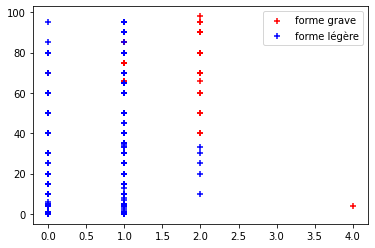

In [6]:
import matplotlib.pyplot as plt

forme = database_arr[:, 0]
grave = forme == 1
steatose = database_arr[:, 1]
inflammation = database_arr[:, 2]
plt.scatter(inflammation[grave], steatose[grave], marker='+', color='r', label='forme grave')
plt.scatter(inflammation[~grave], steatose[~grave], marker='+', color='b', label='forme légère')
plt.legend()

In [1]:
from load_data import database_preop, load_data_from_excel

database_preop(load_data_from_excel())

,Age,Sexe,Poids,Taille,IMC,Hypertension artérielle,Diabète,Dyslipidémie,Syndrome d'apnée du sommeil,Appareillée,...,Rapport Triglyceride/glucose,Index Triglycérides-glucose,HOMA-IR,QUICKI,Index peptide C,Raport DER/BMI,Rapport DER/poids,Présence NASH,Elastométrie,CAP
0,48,1,143,183,42.700588,0,0,0,3,1,...,0.862069,3.972943,7.217778,0.288529,2.009485,68.383133,20.419580,1,4.8,-1
1,55,0,129,176,41.645145,0,0,1,3,1,...,1.238426,3.965898,7.680000,0.286302,3.006253,-1.000000,-1.000000,1,14.5,-1
2,57,0,118,178,37.242772,0,0,0,2,1,...,1.200397,4.086246,4.728889,0.304672,-1.000000,-1.000000,-1.000000,1,-1.0,-1
4,63,0,121,156,49.720579,0,1,0,3,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,-1.0,-1
6,57,0,91,158,36.452492,0,0,1,3,1,...,1.473430,4.004390,2.862222,0.326354,-1.000000,-1.000000,-1.000000,0,-1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,63,0,106,165,38.934803,1,0,0,2,0,...,1.050725,3.857550,2.453333,0.333643,3.467166,41.710755,15.320755,0,10.8,333
783,52,0,107,158,42.861721,1,0,0,3,1,...,1.304714,4.265148,11.440000,0.272786,1.800537,-1.000000,-1.000000,1,9.2,219
784,59,0,149,164,55.398572,1,0,1,-1,-1,...,1.039427,4.112122,3.857778,0.313107,0.222163,38.845766,14.442953,1,10.7,400
785,29,0,112,165,41.138659,0,0,0,2,-1,...,0.950855,3.920666,4.391111,0.307690,4.856255,39.695022,14.580357,0,3.4,278
